In [56]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [57]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [58]:
X_train.shape

(60000, 28, 28)

In [59]:
X_train[0].shape

(28, 28)

In [60]:
y_train #labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

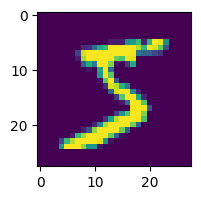

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

In [62]:
# scaling values in the range 0 to 1
X_train = X_train/255
X_test = X_test/255

In [64]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [65]:
model = Sequential()

the data is in the form 28*28
we need to flatten it down


In [66]:
model.add(Flatten(input_shape=(28,28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [70]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4842 - val_loss: 0.1675
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1343 - val_loss: 0.1178
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0903 - val_loss: 0.1032
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0661 - val_loss: 0.0913
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0481 - val_loss: 0.0925
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0379 - val_loss: 0.0926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0287 - val_loss: 0.0910
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0217 - val_loss: 0.0944
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0199 - val_loss: 0.0944
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0150 - val_loss: 0.1002


In [71]:
y_probability = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [72]:
y_pred = y_probability.argmax(axis=1)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9775

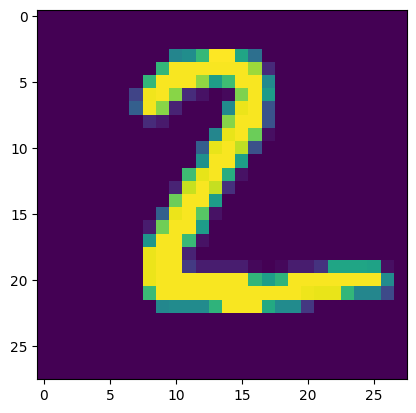

In [78]:
plt.imshow(X_test[1])

In [80]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([2])

In [30]:
model2 = Sequential()

In [32]:
model2.add(Flatten(input_shape=(28,28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model2.add(Dense(128,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [34]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [50]:
model2.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0073 - val_loss: 0.2610
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0030 - val_loss: 0.2676
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0032 - val_loss: 0.2452
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.7314e-04 - val_loss: 0.3018
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0116 - val_loss: 0.2883
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0057 - val_loss: 0.2590
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0016 - val_loss: 0.2747
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0037 - val_loss: 0.2810
Epoch 9/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0038 - val_loss: 0.2677
Epoch 10/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0017 - val_loss: 0.2872
Epoch 11/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0034 - val_loss: 0.3015
Epoch 12/25
1500/1500 ━━━

It seems there is overfitting

In [45]:
y_probability = model2.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
y_pred = y_probability.argmax(axis=1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9813